In [1]:
import numpy as np
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.wcs import WCS
from astropy.io import fits

from matplotlib.colors import LogNorm

from astropy.utils.data import download_file

catalog_path='/Users/EvanB.LAPTOP-8CHCIOMA/Downloads/'

#A100-NSA Catalog
myTab=Table.read(catalog_path+'a100-nsa-for-adap.fits')

In [2]:
#Finding flux in nmgy to W/m^2/Hz
w3nmgy = myTab['w3_nanomaggies']
w3Jy = w3nmgy*(3.631*10**(-6))
w3Flux = w3Jy*10**(-26)

In [3]:
#Finding distance
H0 = 2.3*10**(-18) #/s
c = 3*10**8 #m/s
z = myTab['ZDIST']

v = z*c 
d = v/H0

In [16]:
#Flux of Sun
Msunab = 8.48
Fsun = 3631*10**(Msunab/-2.5) #Jy
Fsun2 = Fsun*10**(-26) #W/m^2/Hz

#Fsun = 10**((Msunab-8.9)/(-2.5))
#Fsun2 = Fsun*10**(-26) #W/m^2/Hz

Lsun = Fsun2*(4*np.pi*d**2)

In [17]:
#Finding luminosity in Solar luminosities
Lw3 = w3Flux*(4*np.pi*d**2)/Lsun

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_15516\2942431370.py:5: RuntimeWarning: divide by zero encountered in log10
  ccode = np.log10(W3snr)
C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_15516\2942431370.py:5: RuntimeWarning: invalid value encountered in log10
  ccode = np.log10(W3snr)
C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_15516\2942431370.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(z,np.log10(Lw3),s=1,c=ccode,cmap='viridis')
C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_15516\2942431370.py:7: RuntimeWarning: invalid value encountered in log10
  plt.scatter(z,np.log10(Lw3),s=1,c=ccode,cmap='viridis')


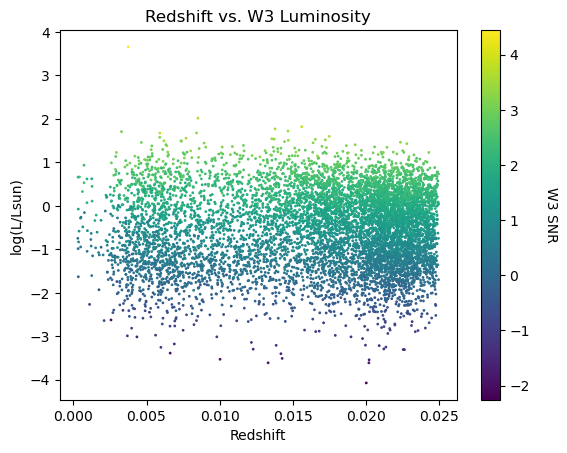

In [24]:
#Plot W3 luminosity vs redshift colored by SNR
W3snr = myTab['w3_nanomaggies']
W3snr_ivar = myTab['w3_nanomaggies_ivar']
W3snr = W3snr*np.sqrt(W3snr_ivar)
ccode = np.log10(W3snr)

plt.scatter(z,np.log10(Lw3),s=1,c=ccode,cmap='viridis')
plt.title('Redshift vs. W3 Luminosity')
plt.ylabel('log(L/Lsun)')
plt.xlabel('Redshift')
cbar = plt.colorbar()
cbar.set_label('W3 SNR',rotation=270,labelpad=20)

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_15516\2568331066.py:3: RuntimeWarning: divide by zero encountered in log10
  ccode = np.log10(size)
C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_15516\2568331066.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(z,np.log10(Lw3),s=1,c=ccode,cmap='viridis')
C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_15516\2568331066.py:5: RuntimeWarning: invalid value encountered in log10
  plt.scatter(z,np.log10(Lw3),s=1,c=ccode,cmap='viridis')


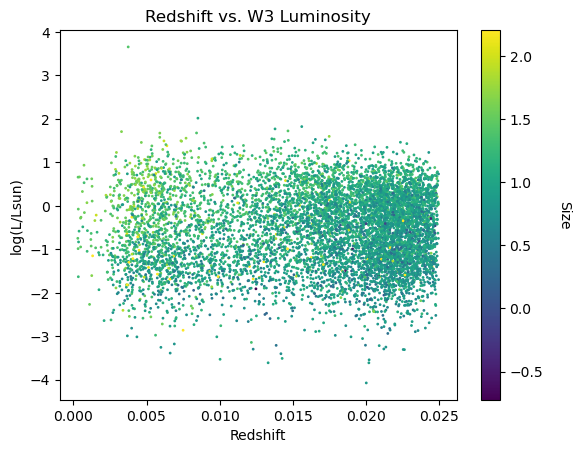

In [26]:
#Plot W3 luminosity vs redshift colored by size
size = myTab['SERSIC_TH50']
ccode = np.log10(size)

plt.scatter(z,np.log10(Lw3),s=1,c=ccode,cmap='viridis')
plt.title('Redshift vs. W3 Luminosity')
plt.ylabel('log(L/Lsun)')
plt.xlabel('Redshift')
cbar = plt.colorbar()
cbar.set_label('Size',rotation=270,labelpad=20)